In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize
import numdifftools as nd

https://stackoverflow.com/questions/78610596/converting-curve-fit-to-optimize-minimize

In [4]:
x, y = np.genfromtxt('gaussian.dat').T

In [12]:
def model(x, A, mu, sigma):
    law = stats.norm(loc=mu, scale=sigma)
    return A * law.pdf(x) / law.pdf(mu)

In [32]:
popt, pcov = optimize.curve_fit(model, x, y)
popt, pcov

(array([9.85743077, 1.96427309, 1.27652119]),
 array([[ 2.92986068e-01,  6.62630072e-10, -2.52941845e-02],
        [ 6.62630072e-10,  6.55112141e-03, -9.75743530e-11],
        [-2.52941845e-02, -9.75743530e-11,  6.55112158e-03]]))

In [20]:
def loss_factory(x, y):
    def wrapped(p):
        return 0.5 * np.sum(np.power(y - model(x, *p), 2))
    return wrapped

In [21]:
loss = loss_factory(x, y)

In [35]:
sol = optimize.minimize(loss, x0=[1., 1., 1.], bounds=[(0, np.inf), (-np.inf, np.inf), (0, np.inf)])
sol

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 16.793558341382255
        x: [ 9.857e+00  1.964e+00  1.277e+00]
      nit: 11
      jac: [ 1.741e-05 -6.537e-05  7.354e-05]
     nfev: 56
     njev: 14
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [43]:
H = nd.Hessian(loss)(sol.x)

In [45]:
C = np.linalg.inv(H)
C

array([[ 3.31906230e-01, -3.53666330e-04, -2.87276565e-02],
       [-3.53666330e-04,  7.41295793e-03,  9.16012115e-05],
       [-2.87276565e-02,  9.16012115e-05,  7.44036351e-03]])

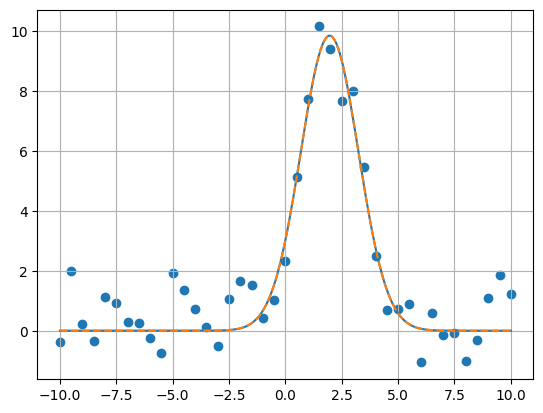

In [38]:
xlin = np.linspace(x.min(), x.max(), 200)
fig, axe = plt.subplots()
axe.scatter(x, y)
axe.plot(xlin, model(xlin, *popt))
axe.plot(xlin, model(xlin, *sol.x), "--")
axe.grid()

[2.8745216  4.67418612]


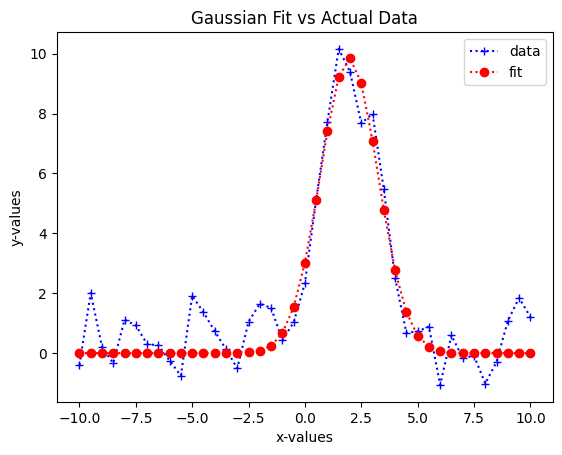

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt('gaussian.dat')
x = data[:, 0]
y = data[:, 1]

n = len(x)                          
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n        

def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gauss,x,y,p0=[1,mean,sigma])

def get_conf_gaus(x: float,popt: np.ndarray, pcov: np.ndarray, n_boostrap:int = 100):

    params = np.random.multivariate_normal(popt, pcov, size = [n_boostrap])
    a = params[:,0]
    mu = params[:,1]
    sigma = params[:,2]

    bootstrap_y = gauss(0.2,a,mu,sigma)
    conf = np.quantile(bootstrap_y, [0.025,0.975])
    return conf

conf = get_conf_gaus(0.2, popt, pcov)
print(conf)

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gauss(x,*popt),'ro:',label='fit')
plt.legend()
plt.title('Gaussian Fit vs Actual Data')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()